In [19]:
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
df1 = pd.read_csv('Lung_Feat.csv')
df_features = df1.drop('T', axis=1)
df_features

,Area,diameter,perimeter,circularity,homogeneity,compactness,homogeneity.1,3d bounding box dim rate,compactness2,clbp mean,...,DC constant,energy,skew inside,kurtosis inside,moment 2,MIP,moment 5,moment 6,moment 7,x-y plane bb rate
0,61.875000,12.000000,32.077140,0.755673,449.718750,1.345392,1.000000,0.758333,2.339759,14.650000,...,1.001611,10.149219,0.462735,3.076589,238.764450,276.318695,65971.18750,1.575287e+07,3.681973e+05,19.111872
1,14.062500,7.500000,16.749615,0.629887,56.306250,1.615692,0.900000,0.693333,2.105107,7.850000,...,1.002350,5.401159,0.182834,1.547886,313.565430,318.816223,99969.98438,3.134799e+07,1.327357e+04,19.048378
2,11.812500,15.750000,13.560380,0.807250,127.968750,1.574249,0.333333,0.333333,3.415881,11.400000,...,1.002419,5.017380,0.095425,1.444559,331.105621,275.847107,91334.75781,3.024172e+07,1.102121e+04,19.080124
3,20.250000,9.750000,21.604931,0.545166,258.862500,1.529404,0.923077,0.494505,3.196538,15.316667,...,1.002237,4.719527,-0.396786,1.803046,196.050644,245.214554,48072.80469,9.425374e+06,2.239375e+04,19.111872
4,13.500000,11.250000,15.744046,0.684401,127.237500,1.334365,0.866667,0.693333,3.898952,13.400000,...,0.980073,5.003018,-0.555117,2.040902,315.546234,252.875107,79794.33594,2.517971e+07,1.348662e+04,19.080124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,140.155313,26.060625,54.991102,0.418325,1632.380344,1.415204,0.516768,0.394122,2.624082,23.701750,...,0.854651,2.595602,0.077089,1.968552,147.351006,187.634361,32620.65571,5.673153e+06,9.594963e+05,8.043876
951,97.250625,17.797500,54.577535,0.294682,875.684672,1.466552,0.635625,0.635625,7.674249,28.009875,...,0.848391,6.997040,-0.086573,1.845774,133.118939,227.202522,35688.02637,5.609722e+06,1.271180e+06,23.307611
952,93.913594,13.348125,34.769701,0.701158,709.595859,1.376667,0.605357,0.559619,1.348210,11.992125,...,0.853556,1.870938,-0.777520,2.167014,104.375659,148.932374,18343.70713,2.261300e+06,4.971556e+05,9.369557
953,25.742812,5.720625,16.605739,0.842614,81.185203,1.192730,0.753333,0.489667,0.934562,4.703625,...,0.853848,2.028066,-0.449440,1.724977,345.055249,257.867678,104990.73000,4.274701e+07,3.699339e+04,9.701880


In [24]:
pca = PCA(n_components=15)
x = StandardScaler().fit_transform(df_features[df_features.columns].values)
pca_result = pca.fit_transform(x)

print("PCA Explained Variance:\n",pca.explained_variance_ratio_)
print("\nCumulative Variance:\n",np.cumsum(pca.explained_variance_ratio_))
print('\n15 PCA components should be good to cover more than 99% of data variance')

PCA Explained Variance:
 [0.34464486 0.17039782 0.11481225 0.08476391 0.06887346 0.0502925
 0.04201717 0.03571407 0.02189207 0.01900879 0.01145486 0.00822359
 0.00778559 0.00614516 0.00461627]

Cumulative Variance:
 [0.34464486 0.51504268 0.62985493 0.71461884 0.7834923  0.8337848
 0.87580198 0.91151604 0.93340811 0.95241691 0.96387177 0.97209535
 0.97988094 0.9860261  0.99064237]

15 PCA components should be good to cover more than 99% of data variance


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

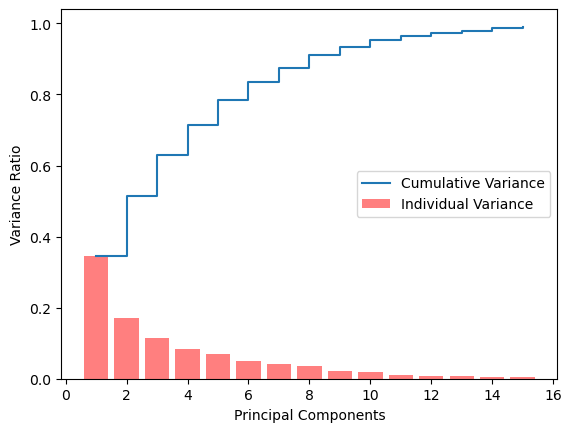

In [27]:
plt.bar(range(1,16), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual Variance', color='red')
plt.step(range(1,16),np.cumsum(pca.explained_variance_ratio_), where= 'post', label='Cumulative Variance')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'center right')
plt.show()

Explanation:
Standardization: The features are standardized using StandardScaler.
PCA: PCA is performed, resulting in pca_result.
Components DataFrame: A DataFrame components_df is created to hold the PCA component loadings, where each row corresponds to a principal component and each column corresponds to a feature.
Top Features Extraction: For the first five principal components, the absolute values of the loadings are used to identify the top five contributing features.
Display: The results are printed out for each principal component.
This will give you a clear view of which features are most influential in the first five principal components.